In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from datasets import *
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from random import randint
import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers.merge import Concatenate
from keras.layers import Input, Reshape, Dense, Conv2D, Dropout, \
    MaxPooling2D, Flatten, UpSampling2D, Multiply, Activation, AveragePooling2D, \
    Add, Subtract, Lambda
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, TensorBoard
from scipy.ndimage import gaussian_filter as blur
from keras.optimizers import Adam
from keras.utils import multi_gpu_model as mgpu
from keras.utils import np_utils
import os, sys
from utils import *

Using TensorFlow backend.


In [ ]:
from models.gap_mask import gap_mask

model = gap_mask(imsize=256)
model.load()

In [ ]:
def naive_sliding(casename):
    rawimg, rawmask = plot_raw(casename, noplot=True)
    print(rawimg.shape, rawmask.shape)

    patchwork = []
    size = 256
    __detected = 0
    for yy in range(rawimg.shape[0] // size):
        patches = []
        for xx in range(rawimg.shape[1] // size):
            y0, x0 = yy * size, xx * size

            patch = rawimg[y0:y0+size, x0:x0+size].astype(np.float32) / 255**2
            patches.append(patch)
        patches = np.array(patches).reshape((len(patches), 256, 256, 1))

        rpnout, yout = model.model.predict(patches)
        row = []
        for ii in range(len(rpnout)):
            A = np.zeros((8, 8))
            if np.argmax(yout[ii]) == 1:
                __detected += 1
                A = rpnout[ii, :, :, 1]
            row.append(A)
        patchwork.append(row)

    print('Collected', len(patchwork), len(patchwork[0]), __detected)
    fsize = len(rpnout[0])
    canvas = np.zeros((fsize * len(patchwork), fsize * len(patchwork[0])))

    for yy, row in enumerate(patchwork):
        for xx, props in enumerate(row):
            canvas[yy*fsize:(yy+1)*fsize, xx*fsize:(xx+1)*fsize] = props

    plt.figure(figsize=(14, 14))
    plt.subplot(2, 2, 1)
    plt.gca().set_title('%.1f~%.1f' % (np.min(canvas), np.max(canvas)))
    plt.imshow(canvas)
    plt.subplot(2, 2, 2)
    plt.imshow(rawimg)

    plt.subplot(2, 2, 3)
    plt.imshow(rawmask)
    plt.subplot(2, 2, 4)
    plt.imshow(rawimg)
    plt.show()
    plt.close()
    
naive_sliding('01352_LEFT_CC')

In [ ]:
naive_sliding('02559_RIGHT_MLO')

In [ ]:
_ = plot_raw('02559_RIGHT_MLO', zoom=(2000, 3200))

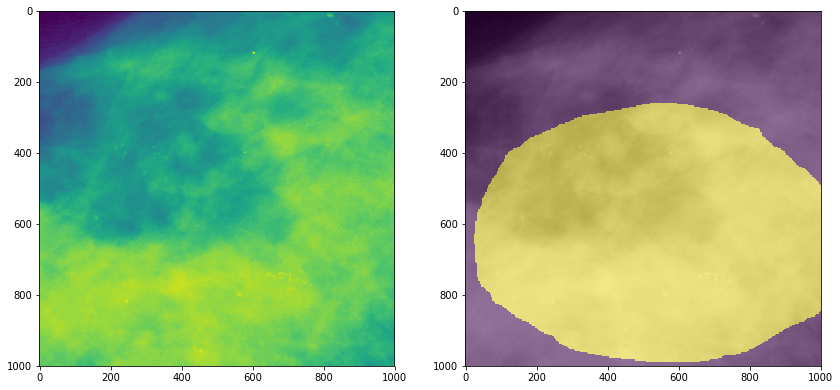

In [4]:
_ = plot_raw('02559_RIGHT_CC', zoom=(2000, 1000))

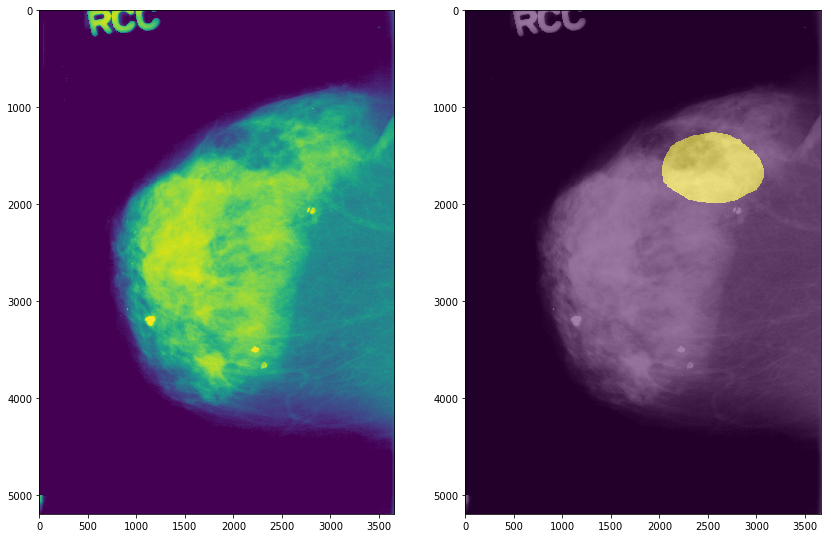

In [5]:
_ = plot_raw('02559_RIGHT_CC', zoom=None)